1. Import libraries

In [7]:
import utils as ul
import numpy as np
import librosa
import matplotlib.pyplot as plt

2. Define analysis parameters

In [2]:
fs=16000
win_dur = 40e-3
hop_dur = 10e-3
win_size = int(np.ceil(win_dur*fs))
hop_size = int(np.ceil(hop_dur*fs))
n_fft = int(2**(np.ceil(np.log2(win_size))))

3. Load audio, extract onset activations, pitch contour and spectrogram

In [3]:
x_mix,_ = librosa.load('./audios/mix.wav', sr=fs)
x_voc,_ = librosa.load('./audios/voc.wav', sr=fs)
odf_voc,_ = ul.getODF(audio = x_voc, fs = fs, winSize = win_size, hopSize = hop_size, nFFT = n_fft, source='vocal')
pitch, time = ul.pitchContour(audio=x_voc, sr=fs, minPitch=98, maxPitch=300)
f,t,X = ul.spectrogram(audio=x_voc, sr=fs, winSize=win_size, hopSize=hop_size, nFFT=n_fft)

/media/rohit/4CCC1A4532B5DBA3/iitb_work/ismir2020/sparc_chap/library-work/utils_nithya.py:567: UserWarning: `ax` is None. Returning pitch and time values.
  warnings.warn('`ax` is None. Returning pitch and time values.')
/media/rohit/4CCC1A4532B5DBA3/iitb_work/ismir2020/sparc_chap/library-work/utils_nithya.py:923: UserWarning: `ax` is None. Returning frequency, time and STFT values.
  warnings.warn('`ax` is None. Returning frequency, time and STFT values.')


### I think we should remove the warnings. These are computation function calls anyway, not plotting. So it's nothing to be worried about that the result was not plotted and instead returned

4. Plot all of them in subplots

/media/rohit/4CCC1A4532B5DBA3/iitb_work/ismir2020/sparc_chap/library-work/utils_nithya.py:725: UserWarning: No duration provided, assuming last time step in pitch contour as duration
  warnings.warn('No duration provided, assuming last time step in pitch contour as duration')


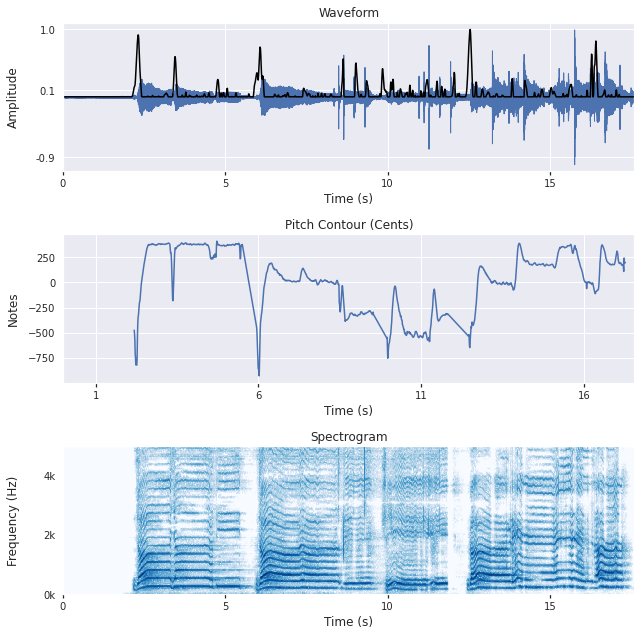

In [4]:
n_subplots=3
fig, ax = ul.generateFig(n_subplots,(9,9),[1/n_subplots]*n_subplots)

ul.drawWave(audio=x_mix, ax=ax[0])
ul.plotODF(odf=odf_voc, sr=fs, hopSize_odf=hop_size, ax=ax[0], updatePlot=True)
ul.plotPitch(pitch, time, ax=ax[1])
ul.plotSpectrogram(X,t,f,ax=ax[2])

for ax_i in ax:
    ax_i.yaxis.set_label_coords(-0.075,0.5)
plt.tight_layout()

### Again, either we put the warning about duration in all plotting functions or not at all.. I don't think it's necessary to have it. 

### The time axis ticks in pitch plot are different from the other two.. that's weird

### I think we can change pitch plot's default y axis to Hz, because I figure that someone using this for the first time will probably not have a metadata file with notes and tonic

5. Plot them in subplots again, this time show x-axis label and tickmarks only in bottom-most plot to avoid duplicates

/media/rohit/4CCC1A4532B5DBA3/iitb_work/ismir2020/sparc_chap/library-work/utils_nithya.py:725: UserWarning: No duration provided, assuming last time step in pitch contour as duration
  warnings.warn('No duration provided, assuming last time step in pitch contour as duration')


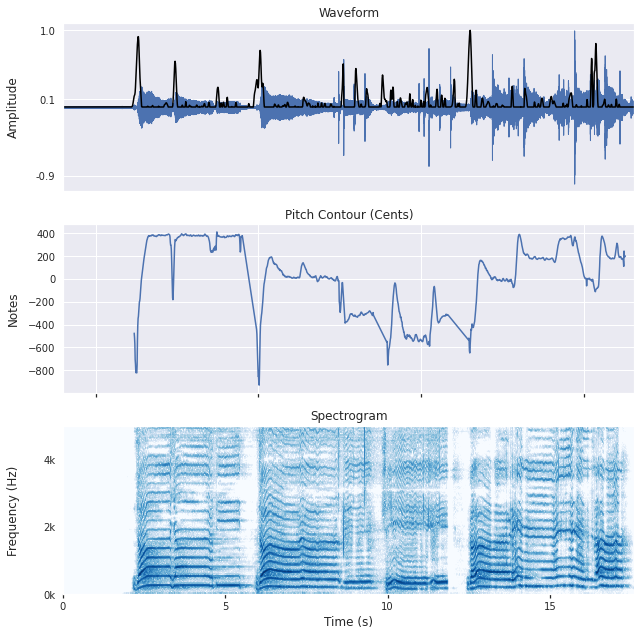

In [6]:
n_subplots=3
fig, ax = ul.generateFig(n_subplots,(9,9),[1/n_subplots]*n_subplots)

ul.drawWave(audio=x_mix, ax=ax[0], xlabel=False, xticks=False)
ul.plotODF(odf=odf_voc, sr=fs, hopSize_odf=hop_size, ax=ax[0], updatePlot=True)
ul.plotPitch(pitch, time, ax=ax[1], xlabel=False, xticks=False)
ul.plotSpectrogram(X,t,f,ax=ax[2])

for ax_i in ax:
    ax_i.yaxis.set_label_coords(-0.075,0.5)
    ax_i.tick_params(axis="x", direction="out")
    
plt.tight_layout()

### For some reason, adding the xtick marks back did not work on ax[0] below (line 11 in cell above this plot). Need to debug